In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import chain
from collections import Counter
# Adjustment Options
pd.set_option('display.max_columns', None) # Display All Columns given the dataset has many columns
pd.set_option('display.max_rows',100)


# Exploring .csv kaggle files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.split(".")[-1] == "csv":
            print(os.path.join(dirname, filename))


/kaggle/input/mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv


In [2]:
df = pd.read_csv("/kaggle/input/mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv")
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [3]:
for i, column in enumerate(df.columns):
    print(i, column)

0 Are you self-employed?
1 How many employees does your company or organization have?
2 Is your employer primarily a tech company/organization?
3 Is your primary role within your company related to tech/IT?
4 Does your employer provide mental health benefits as part of healthcare coverage?
5 Do you know the options for mental health care available under your employer-provided coverage?
6 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
7 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
8 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
9 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
10 Do you think that discussing a mental health disorder with your employer would have negative consequences?

In [4]:
df.isna().sum()

Are you self-employed?                                                                                                                                                                 0
How many employees does your company or organization have?                                                                                                                           287
Is your employer primarily a tech company/organization?                                                                                                                              287
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    287
Do you know the options for mental health care available under your employe

In [5]:
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [6]:
df.iloc[:,48]

0                                                     NaN
1       Anxiety Disorder (Generalized, Social, Phobia,...
2                                                     NaN
3       Anxiety Disorder (Generalized, Social, Phobia,...
4       Anxiety Disorder (Generalized, Social, Phobia,...
                              ...                        
1428                                                  NaN
1429                                                  NaN
1430                                                  NaN
1431    Anxiety Disorder (Generalized, Social, Phobia,...
1432    Obsessive-Compulsive Disorder|Eating Disorder ...
Name: If yes, what condition(s) have you been diagnosed with?, Length: 1433, dtype: object

In [7]:
df.iloc[:,48] = df.iloc[:,48].fillna("None")

In [8]:
df.iloc[:,48].isna().sum()

0

In [9]:
mhc_types = df.iloc[:,48].apply(lambda x:x.split("|")).to_list()

In [10]:
# mhc_types

In [11]:
mhc_types = list(chain.from_iterable(mhc_types))

In [12]:
# mhc_types

In [13]:
mhc_db = dict(Counter(mhc_types))

In [14]:
other = 0
new_mhc_db = {}
for key,value in mhc_db.items():
    if value <= 15:
        other += value
    else:
        new_mhc_db[key] = value    

In [15]:
print(other)

40


In [16]:
new_mhc_db["Other"] = other

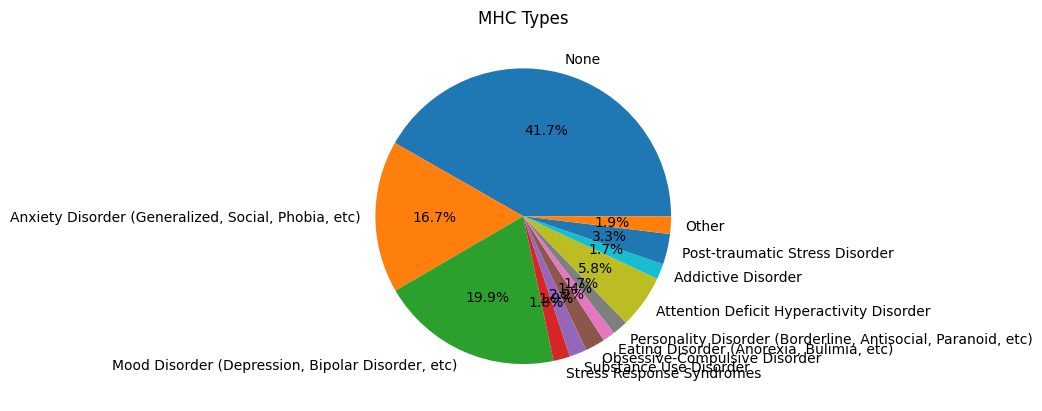

In [17]:
plt.pie(new_mhc_db.values(), labels=new_mhc_db.keys(), autopct='%1.1f%%')
plt.title('MHC Types')
plt.show()